# Описание проекта
Вы работаете в интернет-магазине «Стримчик», который продаёт по всему миру компьютерные игры. Из открытых источников доступны исторические данные о продажах игр, оценки пользователей и экспертов, жанры и платформы (например, Xbox или PlayStation). Вам нужно выявить определяющие успешность игры закономерности. Это позволит сделать ставку на потенциально популярный продукт и спланировать рекламные кампании.

<div class="alert alert-info">
Привет! Меня зовут Никита Мишин и я буду твоим ревьюером по этому проекты.
Для простоты предлагаю общение на 'ты'. Буду предполагать, что ты не против:) 
Если более предпочтительно обращение на 'Вы', пиши, не стесняйся.
Также если будут возникать вопросы, аналогично, пиши:)

Предлагаю работать в известном тебе итеративном формате.
Итерация состоит в моей проверке твоего решения. 
После решения могут остаться какие-то недочеты, которые я попрошу тебя устранить, ты их исправляешь и я проверяю твои решения.
    Оставленные мною комментарии могут быть разного вида:
   
    - зеленый: элегантные решения, которые тебе стоит запомнит и в дальнейшем взять на вооружение:) 
    
    - желтый: сигнал о том, что есть некритичная вещь(не всегда ошибка), что нужно точно поправить в следующей работе, даже желательно в этой (полезно, в первую очередь, для тебя:) ).Также это рекомендации на будущее    

    - красный: недочет, который нужно исправить в этой работе, для того, чтобы она была принята
    
    - синий: полезная информация, доп ресурсы, "вопросы на подумать"

Также попрошу не удалять мои комментарии:) <a class="tocSkip">
</div>

![](https://media1.tenor.com/images/e50bc7f3c1cb190c06142374ccbd28d4/tenor.gif?itemid=6164628)

# Содержание 

1. [Шаг 1. Открыть файл с данными и изучить общую информацию](#1)
2. [Шаг 2. Подготовить данные](#2)
3. [Шаг 3. Провести исследовательский анализ данных](#3)
4. [Шаг 4. Составить портрет пользователя каждого региона](#4)
5. [Шаг 5. Проверить гипотезы](#5)
6. [Шаг 6.  Общий вывод](#6)

<a id="1"></a> <br>
## Шаг 1. Откройте файл с данными и изучите общую информацию

In [56]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
from scipy import stats as st

import seaborn as sns
import warnings
warnings.filterwarnings("ignore")









df= pd.read_csv('/datasets/games.csv')
display(df.head())
display(df.info())
display(df.describe())



,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
Name               16713 non-null object
Platform           16715 non-null object
Year_of_Release    16446 non-null float64
Genre              16713 non-null object
NA_sales           16715 non-null float64
EU_sales           16715 non-null float64
JP_sales           16715 non-null float64
Other_sales        16715 non-null float64
Critic_Score       8137 non-null float64
User_Score         10014 non-null object
Rating             9949 non-null object
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


None

,Year_of_Release,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score
count,16446.000000,16715.000000,16715.000000,16715.000000,16715.000000,8137.000000
mean,2006.484616,0.263377,0.145060,0.077617,0.047342,68.967679
std,5.877050,0.813604,0.503339,0.308853,0.186731,13.938165
min,1980.000000,0.000000,0.000000,0.000000,0.000000,13.000000
25%,2003.000000,0.000000,0.000000,0.000000,0.000000,60.000000
50%,2007.000000,0.080000,0.020000,0.000000,0.010000,71.000000
75%,2010.000000,0.240000,0.110000,0.040000,0.030000,79.000000
max,2016.000000,41.360000,28.960000,10.220000,10.570000,98.000000


In [57]:
df.sample(n=10,random_state=5)

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
9084,Pipe Mania,PS2,2008.0,Puzzle,0.07,0.05,0.00,0.02,68.0,tbd,E
4870,Planet 51,DS,2009.0,Action,0.22,0.14,0.00,0.04,NaN,tbd,E
15561,Tsuki ni Yori Sou Otome no Sahou: Hidamari no ...,PSV,2015.0,Adventure,0.00,0.00,0.02,0.00,NaN,NaN,NaN
7767,Shiren the Wanderer,Wii,2008.0,Role-Playing,0.08,0.00,0.11,0.01,71.0,7.6,T
5345,High School Musical 3: Senior Year DANCE!,PS2,2008.0,Misc,0.17,0.13,0.00,0.04,NaN,NaN,NaN
14444,Sitting Ducks,GBA,2003.0,Platform,0.02,0.01,0.00,0.00,35.0,tbd,E
13823,Motto TOEIC Test DS Training,DS,2008.0,Misc,0.00,0.00,0.04,0.00,NaN,NaN,NaN
5873,F1 2013,X360,2013.0,Racing,0.01,0.27,0.00,0.02,79.0,6.6,E
2793,Classic NES Series: Donkey Kong,GBA,2004.0,Platform,0.40,0.15,0.17,0.01,55.0,4.8,E
13865,Cyber Troopers Virtual-On Marz,PS2,2003.0,Fighting,0.02,0.01,0.00,0.00,NaN,NaN,NaN


Большое количество пропусков в  Critic_Score ,User_Score ,rating , думаю не все игры попадают в поле зрение критиков , особенно на непопулярных платформах .

<div class="alert alert-info">
<h1>Комментарий ревьюера <a class="tocSkip"></a></h1>
Для разнообразия полезно использовать метод sample  с зафиксированным random state --- будет выдавать случайные строки из датасета
</div>

<div class="alert alert-success">
Молодец, что группируешь все импорты в одном месте, такая структуризации полезна и удобна
</div>

<div class="alert alert-warning">
<h1>Комментарий ревьюера <a class="tocSkip"></a></h1>
Очень не хватает промежуточных выводов
</div>

<div class="alert alert-info">
<h1>Комментарий студента <a class="tocSkip"></a></h1>
Добавил метод sample  с зафиксированным random state , добавил вывод
</div>

<div class="alert alert-success">
<h1>Комментарий ревьюера v2 <a class="tocSkip"></a></h1>
Круто, молодец
</div>

<a id="2"></a> <br>
## Шаг 2. Подготовьте данные

- Замените названия столбцов (приведите к нижнему регистру);

In [58]:
df.columns=df.columns.str.lower()

<div class="alert alert-success">
<h1>Комментарий ревьюера <a class="tocSkip"></a></h1>
Молодец, элегантное решение
</div>

- Преобразуйте данные в нужные типы. Опишите, в каких столбцах заменили тип данных и почему;

In [59]:
display(df.head(10))
df.info()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
5,Tetris,GB,1989.0,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN
6,New Super Mario Bros.,DS,2006.0,Platform,11.28,9.14,6.50,2.88,89.0,8.5,E
7,Wii Play,Wii,2006.0,Misc,13.96,9.18,2.93,2.84,58.0,6.6,E
8,New Super Mario Bros. Wii,Wii,2009.0,Platform,14.44,6.94,4.70,2.24,87.0,8.4,E
9,Duck Hunt,NES,1984.0,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
name               16713 non-null object
platform           16715 non-null object
year_of_release    16446 non-null float64
genre              16713 non-null object
na_sales           16715 non-null float64
eu_sales           16715 non-null float64
jp_sales           16715 non-null float64
other_sales        16715 non-null float64
critic_score       8137 non-null float64
user_score         10014 non-null object
rating             9949 non-null object
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


In [60]:
df=df.dropna(subset=['name' , 'year_of_release'])
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16444 entries, 0 to 16714
Data columns (total 11 columns):
name               16444 non-null object
platform           16444 non-null object
year_of_release    16444 non-null float64
genre              16444 non-null object
na_sales           16444 non-null float64
eu_sales           16444 non-null float64
jp_sales           16444 non-null float64
other_sales        16444 non-null float64
critic_score       7983 non-null float64
user_score         9839 non-null object
rating             9768 non-null object
dtypes: float64(6), object(5)
memory usage: 1.5+ MB


<div class="alert alert-info">
<h1>Комментарий ревьюера <a class="tocSkip"></a></h1>
Стоило явно прописать, сколько удалено записей, почему удаление не сместит последующий анализ
</div>

### Удалил пропущеные данные по имени и году выпуска игры

In [61]:
display(df.groupby('genre')['critic_score'].mean())

genre
Action          66.676931
Adventure       65.268750
Fighting        69.155556
Misc            66.648330
Platform        68.124490
Puzzle          67.231818
Racing          68.006897
Role-Playing    72.655267
Shooter         70.260022
Simulation      68.609195
Sports          71.993133
Strategy        72.158784
Name: critic_score, dtype: float64

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
16,Grand Theft Auto V,PS3,2013.0,Action,7.02,9.09,0.98,3.96,97.0,8.2,M
17,Grand Theft Auto: San Andreas,PS2,2004.0,Action,9.43,0.40,0.41,10.57,95.0,9,M
23,Grand Theft Auto V,X360,2013.0,Action,9.66,5.14,0.06,1.41,97.0,8.1,M
24,Grand Theft Auto: Vice City,PS2,2002.0,Action,8.41,5.49,0.47,1.78,95.0,8.7,M
38,Grand Theft Auto III,PS2,2001.0,Action,6.99,4.51,0.30,1.30,97.0,8.5,M
42,Grand Theft Auto V,PS4,2014.0,Action,3.96,6.31,0.38,1.97,97.0,8.3,M
46,Pokemon HeartGold/Pokemon SoulSilver,DS,2009.0,Action,4.34,2.71,3.96,0.76,NaN,NaN,NaN
51,Grand Theft Auto IV,X360,2008.0,Action,6.76,3.07,0.14,1.03,98.0,7.9,M
57,Grand Theft Auto IV,PS3,2008.0,Action,4.76,3.69,0.44,1.61,98.0,7.5,M
81,FIFA Soccer 13,PS3,2012.0,Action,1.06,5.01,0.13,1.97,88.0,6.6,E


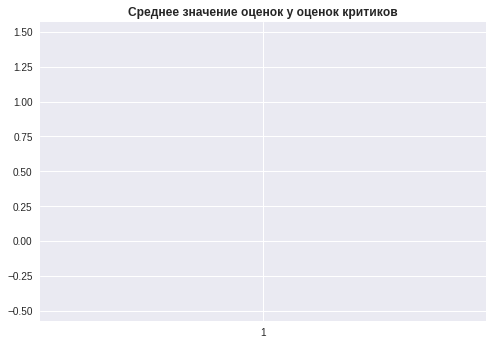

In [62]:
df_action=df.query('genre=="Action"')
display(df_action.head(10))
plt.title('Среднее значение оценок у оценок критиков' , fontweight='bold')
plt.boxplot(df_action['critic_score'])
plt.show()

<div class="alert alert-info">
<h1>Комментарий ревьюера <a class="tocSkip"></a></h1>
Не хватает названия у графика;)
</div>

<div class="alert alert-info">
<h1>Комментарий студента <a class="tocSkip"></a></h1>
Добавил название к графику 
</div>

<div class="alert alert-success">
<h1>Комментарий ревьюера v2 <a class="tocSkip"></a></h1>
Лайк!</div>

In [63]:
for genre in df['genre'].unique():    
    df.loc[(df['critic_score'].isna())&(df['genre']==genre ), 'critic_score' ]=df.loc[df['genre']==genre ,'critic_score'].median()
display(df.head(10))
df['user_score']=pd.to_numeric(df['user_score'],errors='coerce')

for genre in df['genre'].unique():    
    df.loc[(df['user_score'].isna())&(df['genre']==genre ), 'user_score' ]=df.loc[df['genre']==genre ,'user_score'].median()
display(df.head(10))




,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,69.5,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,74.0,NaN,NaN
5,Tetris,GB,1989.0,Puzzle,23.20,2.26,4.22,0.58,70.0,NaN,NaN
6,New Super Mario Bros.,DS,2006.0,Platform,11.28,9.14,6.50,2.88,89.0,8.5,E
7,Wii Play,Wii,2006.0,Misc,13.96,9.18,2.93,2.84,58.0,6.6,E
8,New Super Mario Bros. Wii,Wii,2009.0,Platform,14.44,6.94,4.70,2.24,87.0,8.4,E
9,Duck Hunt,NES,1984.0,Shooter,26.93,0.63,0.28,0.47,73.0,NaN,NaN


,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,69.5,7.7,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,74.0,7.8,NaN
5,Tetris,GB,1989.0,Puzzle,23.20,2.26,4.22,0.58,70.0,7.5,NaN
6,New Super Mario Bros.,DS,2006.0,Platform,11.28,9.14,6.50,2.88,89.0,8.5,E
7,Wii Play,Wii,2006.0,Misc,13.96,9.18,2.93,2.84,58.0,6.6,E
8,New Super Mario Bros. Wii,Wii,2009.0,Platform,14.44,6.94,4.70,2.24,87.0,8.4,E
9,Duck Hunt,NES,1984.0,Shooter,26.93,0.63,0.28,0.47,73.0,7.4,NaN


<div class="alert alert-info">
<h1>Комментарий ревьюера <a class="tocSkip"></a></h1>
Можно элегантнее. Смотри <a href='https://stackoverflow.com/questions/19966018/pandas-filling-missing-values-by-mean-in-each-group'>пример</a>
</div>

### Заменили пропущенные значения в рейтингах от критиков и от пользователей на медианное значение 

In [64]:

df['year_of_release']=df['year_of_release'].astype('int16')
df['na_sales']=df['na_sales'].astype('float16')
df['eu_sales']=df['eu_sales'].astype('float16')
df['jp_sales']=df['jp_sales'].astype('float16')
df['other_sales']=df['other_sales'].astype('float16')
df['other_sales']=df['other_sales'].astype('float16')
df['critic_score']=df['critic_score'].astype('float16')
df['user_score']=df['user_score'].astype('float16')
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16444 entries, 0 to 16714
Data columns (total 11 columns):
name               16444 non-null object
platform           16444 non-null object
year_of_release    16444 non-null int16
genre              16444 non-null object
na_sales           16444 non-null float16
eu_sales           16444 non-null float16
jp_sales           16444 non-null float16
other_sales        16444 non-null float16
critic_score       16444 non-null float16
user_score         16444 non-null float16
rating             9768 non-null object
dtypes: float16(6), int16(1), object(4)
memory usage: 867.2+ KB


<div class="alert alert-success">
<h1>Комментарий ревьюера <a class="tocSkip"></a></h1>
Да, хорошее решение. Можно было бы, кстати, в некоторых местах использовать для храненя unsigned char.

А для жанра и платформ использовать тип категория
</div>

In [65]:

decimals = 2    
df['na_sales'] = df['na_sales'].apply(lambda x: round(x, decimals))
df['eu_sales'] = df['eu_sales'].apply(lambda x: round(x, decimals))
df['jp_sales'] = df['jp_sales'].apply(lambda x: round(x, decimals))
df['other_sales'] = df['other_sales'].apply(lambda x: round(x, decimals))
df['user_score'] = df['user_score'].apply(lambda x: round(x, decimals))
display(df.head(10))

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006,Sports,41.38,28.95,3.77,8.45,76.0,8.0,E
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,69.5,7.7,NaN
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,74.0,7.8,NaN
5,Tetris,GB,1989,Puzzle,23.20,2.26,4.22,0.58,70.0,7.5,NaN
6,New Super Mario Bros.,DS,2006,Platform,11.28,9.14,6.50,2.88,89.0,8.5,E
7,Wii Play,Wii,2006,Misc,13.96,9.18,2.93,2.84,58.0,6.6,E
8,New Super Mario Bros. Wii,Wii,2009,Platform,14.44,6.94,4.70,2.24,87.0,8.4,E
9,Duck Hunt,NES,1984,Shooter,26.94,0.63,0.28,0.47,73.0,7.4,NaN


<div class="alert alert-success">
<h1>Комментарий ревьюера <a class="tocSkip"></a></h1>
Классно, что умеешь пользоваться лямбдами, лайк!
</div>

### Заменили типы, округлили  значения колонок 

- Обратите внимание на аббревиатуру 'tbd' в столбцах с рейтингом. Отдельно разберите это значение и опишите, как его обработать;

Нашел несколько значений аббревиатуры 'tbd' :To Be Determined ;To Be Done ;To Be Discussed  . Значение tbd я встретил в колонке "user_score" , вероятно  тут подходит значение To Be Discussed " подлежит обсуждению" , заменил на медианное значение для подобного жанра 

<div class="alert alert-success">
<h1>Комментарий ревьюера <a class="tocSkip"></a></h1>
Верно!
</div>

- Опишите причины, которые могли привести к пропускам;

Вероятнее всего  в данных много игр , которые не слишком  популярны , поэтому критики и пользователи  не обращали на них большого внимания и не выставляли им рейтинги 

<div class="alert alert-info">
<h1>Комментарий ревьюера <a class="tocSkip"></a></h1>
Хорошая гипотеза, стоит проверить
</div>

In [66]:
#rating=df[['genre','rating']].value_counts()
display(df.groupby(['genre' ,'rating'])['user_score'].count())

genre         rating
Action        AO           1
              E          410
              E10+       468
              EC           1
              M          596
              T          670
Adventure     E          159
              E10+        67
              EC           2
              M           98
              T          114
Fighting      E            8
              E10+        19
              M           48
              T          357
Misc          E          449
              E10+       166
              EC           5
              K-A          1
              M           13
              T          228
Platform      E          354
              E10+       141
              M            3
              T           63
Puzzle        E          284
              E10+        42
              T           10
Racing        E          576
              E10+        95
              M           18
              T          167
Role-Playing  E           83
              E10+    

### Колонку "rating" оставлю без изменений так как не понятно по какому принципу выставляется рейтинг и строгой зависимости между жанром и рейтингом нет  

- Посчитайте суммарные продажи во всех регионах и запишите их в отдельный столбец.

In [67]:
df['sales_total']=df['na_sales']+df['eu_sales']+df['jp_sales']+df['other_sales']
display(df.head(10))

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,sales_total
0,Wii Sports,Wii,2006,Sports,41.38,28.95,3.77,8.45,76.0,8.0,E,82.55
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,69.5,7.7,NaN,40.24
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,35.52
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E,32.77
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,74.0,7.8,NaN,31.38
5,Tetris,GB,1989,Puzzle,23.20,2.26,4.22,0.58,70.0,7.5,NaN,30.26
6,New Super Mario Bros.,DS,2006,Platform,11.28,9.14,6.50,2.88,89.0,8.5,E,29.80
7,Wii Play,Wii,2006,Misc,13.96,9.18,2.93,2.84,58.0,6.6,E,28.91
8,New Super Mario Bros. Wii,Wii,2009,Platform,14.44,6.94,4.70,2.24,87.0,8.4,E,28.32
9,Duck Hunt,NES,1984,Shooter,26.94,0.63,0.28,0.47,73.0,7.4,NaN,28.32


<div class="alert alert-warning">
<h1>Комментарий ревьюера <a class="tocSkip"></a></h1>
Опять же нет промежуточных выводов исследования;)
</div>

<a id="3"></a> <br>
## Шаг 3. Проведите исследовательский анализ данных

- Посмотрите, сколько игр выпускалось в разные годы. Важны ли данные за все периоды?

year_of_release
2008    1427
2009    1426
2010    1255
2007    1197
2011    1136
2006    1006
2005     939
2002     829
2003     775
2004     762
2012     653
2015     606
2014     581
2013     544
2016     502
2001     482
1998     379
2000     350
1999     338
1997     289
1996     263
1995     219
1994     121
1993      60
1981      46
1992      43
1991      41
1982      36
1986      21
1983      17
1989      17
1987      16
1990      16
1988      15
1985      14
1984      14
1980       9
Name: name, dtype: int64

37

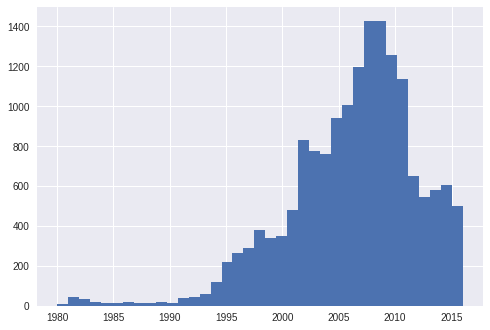

In [68]:
display(df.groupby('year_of_release')['name'].count().sort_values(ascending=False))
display(len(df['year_of_release'].unique()))
df['year_of_release'].hist(bins=37)

### с 1980 по 1995 игры  практически не выпускались , с 1995 года по 2009 видим постоянный рост из года в год на максимумах до  более1400 игр в год . в 2012 году резкий обвал в 2,5 раза по количеству  выпушенных игр в год . с 2012 по 2016 в среднем год выпускают по 600 игр

<div class="alert alert-info">
<h1>Комментарий ревьюера <a class="tocSkip"></a></h1>
Как ты думаешь, с чем это связано?

</div>

- Посмотрите, как менялись продажи по платформам. Выберите платформы с наибольшими суммарными продажами и постройте распределение по годам. За какой характерный срок появляются новые и исчезают старые платформы?

In [69]:
top5_platform = df.groupby('platform')['sales_total'].sum().sort_values(ascending=False).head().reset_index()
top5_list=top5_platform['platform'].tolist()

all_platforms = df['platform'].unique()    
top5_sales=df.groupby(['platform','year_of_release'])['sales_total'].sum().sort_values(ascending=False).reset_index()


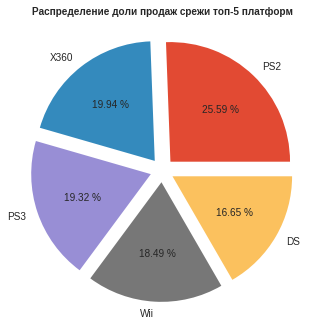

In [70]:
plt.style.use('ggplot')
explode=(.1,.1,.1,.1,.1)
plt.pie(top5_platform['sales_total'], labels= top5_platform['platform'] , autopct='%.2f %%' ,explode=explode)
plt.title('Распределение доли продаж срежи топ-5 платформ' , fontweight='bold', fontsize=10)


plt.show()

<div class="alert alert-success">
<h1>Комментарий ревьюера <a class="tocSkip"></a></h1>
Молодец, верный выбор пайчарта для визуализации
</div>

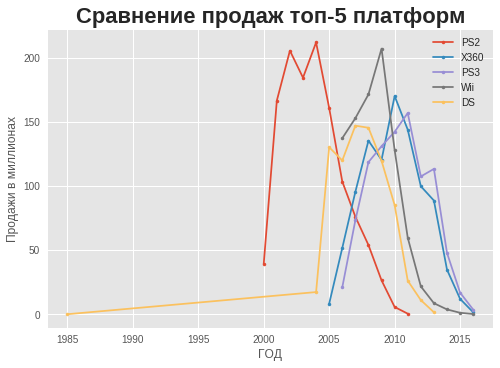

In [71]:

for p in top5_list:
    data=top5_sales.query('platform==@p').sort_values(by='year_of_release',ascending=True)
    plt.plot(data.year_of_release , data.sales_total, label=p , marker='.' )
    plt.legend()
    plt.title('Сравнение продаж топ-5 платформ' , fontweight = 'bold',fontsize =22)
    plt.xlabel('ГОД')
    plt.ylabel('Продажи в миллионах')

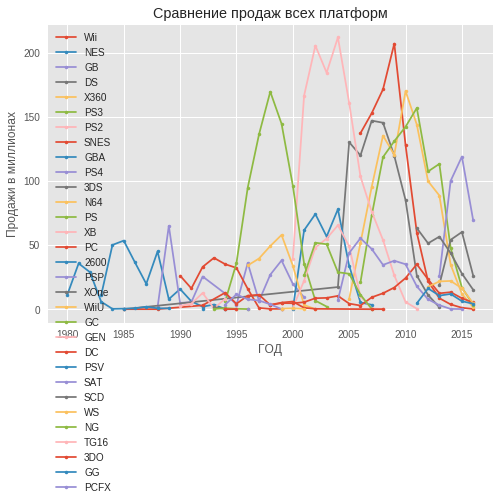

In [72]:


for p in all_platforms:
   
    


    data=top5_sales.query('platform==@p').sort_values(by='year_of_release',ascending=True)
    plt.plot(data.year_of_release , data.sales_total, label=p , marker='.' )
    plt.legend()
    plt.title('Сравнение продаж всех платформ')
    plt.xlabel('ГОД')
    plt.ylabel('Продажи в миллионах')
    

<div class="alert alert-info">
<h1>Комментарий ревьюера <a class="tocSkip"></a></h1>
Тут стоило обозначить средний цикл жизни платформы
</div>

<div class="alert alert-warning">
<h1>Комментарий ревьюера <a class="tocSkip"></a></h1>
Тут советую график больше сделать, тогда проблема с таким отображение должна пропасть, а то малочитаем в данный момент график
</div>

<div class="alert alert-success">
<h1>Комментарий ревьюера <a class="tocSkip"></a></h1>
Классно автоматизировал построение через цикл, молодец
</div>

Прослеживается общая тенденчия на уменьшение продаж 


- Возьмите данные за соответствующий актуальный период. Актуальный период определите самостоятельно в результате исследования предыдущих вопросов. Основной фактор — эти данные помогут построить прогноз на 2017 год. 
Индустрия игр очень бытро меняется поэтому возьму пердио в 5 лет 

<div class="alert alert-success">
<h1>Комментарий ревьюера <a class="tocSkip"></a></h1>
Хороший выбор, но я бы скорее взял 7-8 лет
</div>

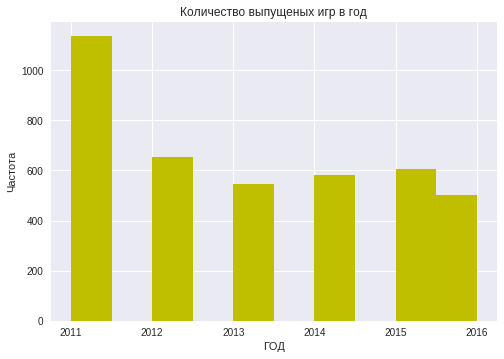

In [104]:
df_5years= df.query('year_of_release >=2011')
plt.title('Количество выпущеных игр в год')
plt.hist(df_5years['year_of_release'] ,color='y')
plt.xlabel('ГОД')
plt.ylabel('Частота')
plt.show()

<div class="alert alert-warning">
<h1>Комментарий ревьюера <a class="tocSkip"></a></h1>
Все же выделю желтым. Вот представь, показываешь ты такой график и люди на него посмотрят и ничего не поймут. Не хватает названий осей и самого графика
</div>

<div class="alert alert-success">
<h1>Комментарий ревьюера v2 <a class="tocSkip"></a></h1>
Теперь стало получше:)
</div>

In [74]:
top5= df_5years.groupby('platform')['sales_total'].sum().sort_values(ascending=False).head().reset_index()
display(top5)
top5_list=top5['platform'].tolist()
top5_per_year= df_5years.groupby(['platform','year_of_release'])['sales_total'].sum().sort_values(ascending=False).reset_index()


,platform,sales_total
0,PS3,445.57
1,X360,380.38
2,PS4,314.14
3,3DS,257.81
4,XOne,159.32


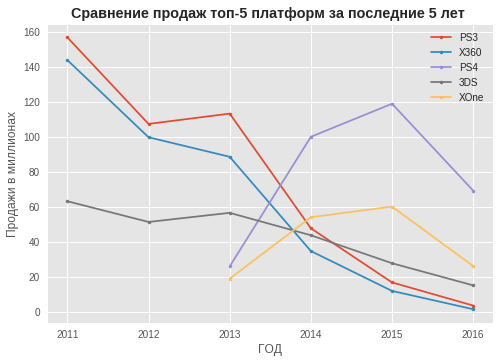

In [75]:

for p in top5_list:
    data=top5_per_year.query('platform==@p').sort_values(by='year_of_release',ascending=True)
    plt.plot(data.year_of_release , data.sales_total, label=p , marker='.' )
    plt.legend()
    plt.title('Сравнение продаж топ-5 платформ за последние 5 лет ', fontweight ='bold')
    plt.xlabel('ГОД')
    plt.ylabel('Продажи в миллионах')



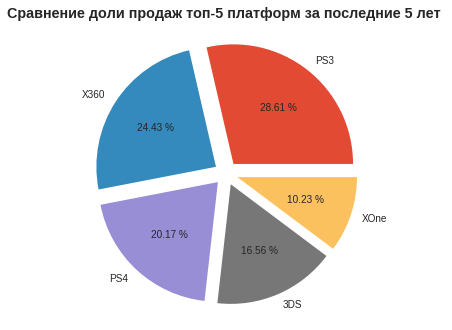

In [76]:
plt.title('Сравнение доли продаж топ-5 платформ за последние 5 лет ', fontweight ='bold')
explode=(.1,.1,.1,.1,.1)
plt.pie(top5['sales_total'] , labels=top5['platform'], autopct='%.2f %%', explode=explode)
plt.show()

- Постройте график «ящик с усами» по глобальным продажам игр в разбивке по платформам. Опишите результат.

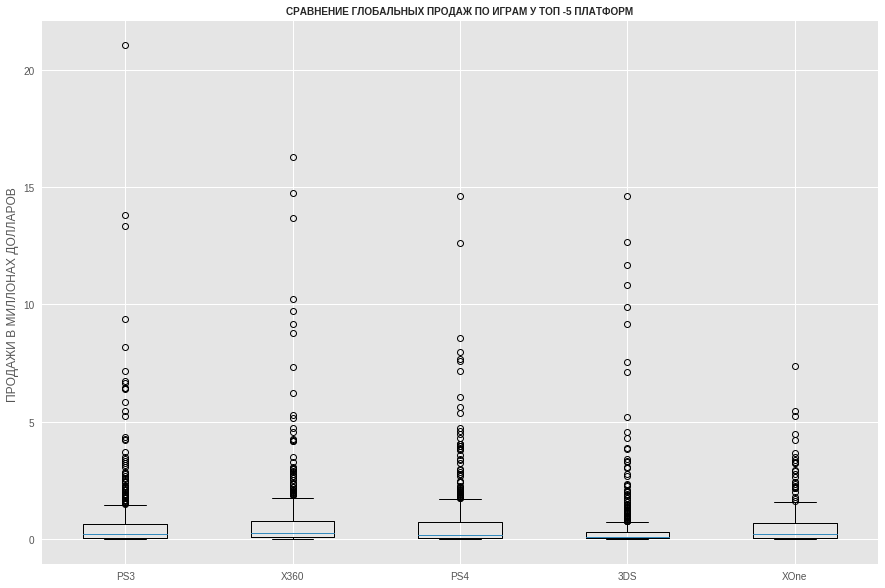

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,sales_total
16,Grand Theft Auto V,PS3,2013,Action,7.02,9.09,0.98,3.96,97.0,8.2,M,21.05
23,Grand Theft Auto V,X360,2013,Action,9.66,5.14,0.06,1.41,97.0,8.1,M,16.27
29,Call of Duty: Modern Warfare 3,X360,2011,Shooter,9.04,4.24,0.13,1.32,88.0,3.4,M,14.73
31,Call of Duty: Black Ops 3,PS4,2015,Shooter,6.03,5.86,0.36,2.38,73.0,7.4,NaN,14.63
33,Pokemon X/Pokemon Y,3DS,2013,Role-Playing,5.28,4.19,4.35,0.78,74.0,7.8,NaN,14.60
34,Call of Duty: Black Ops II,PS3,2012,Shooter,4.99,5.73,0.65,2.42,83.0,5.3,M,13.79
35,Call of Duty: Black Ops II,X360,2012,Shooter,8.25,4.24,0.07,1.12,83.0,4.8,M,13.68
37,Call of Duty: Modern Warfare 3,PS3,2011,Shooter,5.54,5.73,0.49,1.57,88.0,3.2,M,13.33
40,Mario Kart 7,3DS,2011,Racing,5.03,4.02,2.69,0.91,85.0,8.2,E,12.65
42,Grand Theft Auto V,PS4,2014,Action,3.96,6.31,0.38,1.97,97.0,8.3,M,12.62


In [77]:
ps3=df_5years.loc[df_5years['platform']=='PS3']['sales_total']
x360=df_5years.loc[df_5years['platform']=='X360']['sales_total']
ps4=df_5years.loc[df_5years['platform']=='PS4']['sales_total']
ds3=df_5years.loc[df_5years['platform']=='3DS']['sales_total']
xone=df_5years.loc[df_5years['platform']=='XOne']['sales_total']
plt.figure(figsize=(15,10))
labels=['PS3','X360','PS4','3DS','XOne']
plt.title('СРАВНЕНИЕ ГЛОБАЛЬНЫХ ПРОДАЖ ПО ИГРАМ У ТОП -5 ПЛАТФОРМ', fontweight='bold', fontsize=10)
plt.ylabel('ПРОДАЖИ В МИЛЛОНАХ ДОЛЛАРОВ ')
plt.boxplot([ps3,x360,ps4,ds3,xone], labels=labels)

plt.show()
top1=df_5years.query('sales_total> 10')
top1

#### Видим ,что платформа  3DS  по продажам обходит XOne  не за счет в среднем большых продаж на игру  ,а за счет  бОльшего количества  игр, которые  продались гораздо лучше средних значений . Средний разброс продаж на каждую игру у XOne лучше . Делаем вывод ,что  у 3DS  игры в срднем хуже продаются , но отдельные игры делают большое количество продаж . У PS3 , X360 , PS4 ,  состояние со средним значением продаж  и с количеством игр , которые перепрыгнули  3std ，примерно одинаковое . Вывел список игр , которые деелали рекордные выручки  свыше 10 миллионов

<div class="alert alert-success">
<h1>Комментарий ревьюера <a class="tocSkip"></a></h1>
Верное замечание, молодец!
</div>

- Посмотрите, как влияют на продажи внутри одной популярной платформы отзывы пользователей и критиков. Постройте диаграмму рассеяния и посчитайте корреляцию между отзывами и продажами. Сформулируйте выводы.

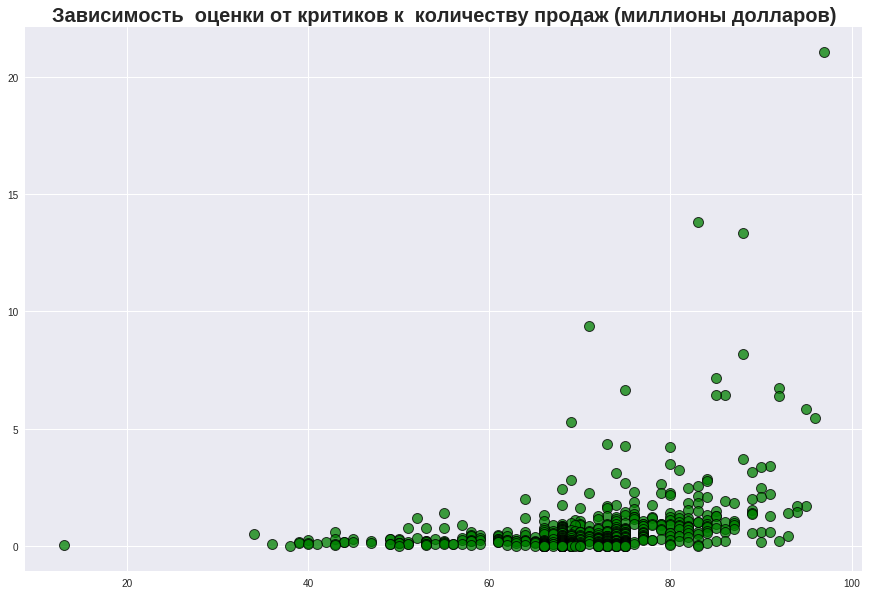

Корреляция равна 0.36


In [78]:
ps3_data=df_5years.query('platform=="PS3"')
ps3_data_c = ps3_data[['critic_score','sales_total']]
plt.style.use('seaborn')
plt.figure(figsize=(15,10))
plt.title('Зависимость  оценки от критиков к  количеству продаж (миллионы долларов)' , fontweight='bold', fontsize=20)

plt.scatter(ps3_data_c['critic_score'] ,ps3_data_c['sales_total'], s=100 , c='g' , cmap='Greens', edgecolor='black',linewidth=1, alpha=0.75)

plt.show()
corr_critics=ps3_data_c['critic_score'].corr(ps3_data_c['sales_total'])
print( 'Корреляция равна {:.2f}'.format(corr_critics))

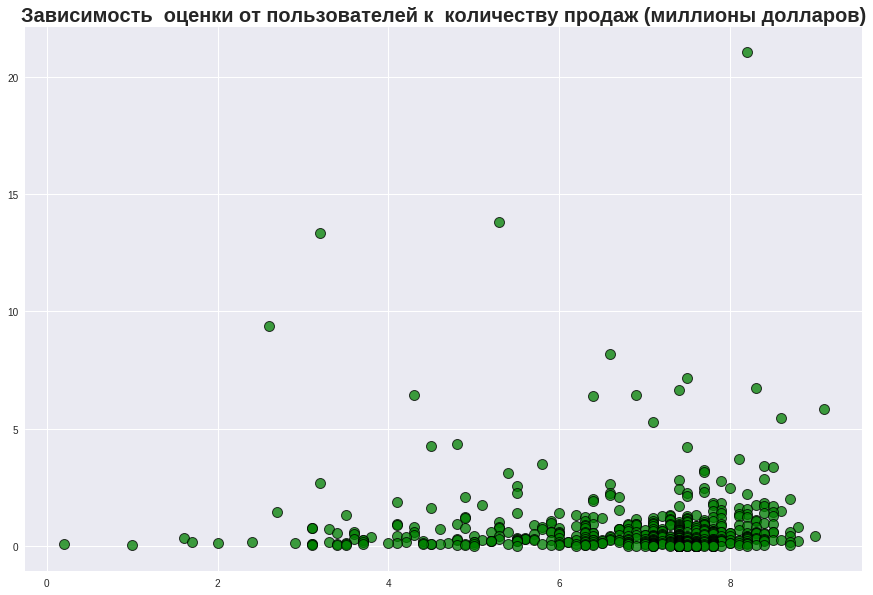

Корреляция равна -0.07


In [79]:
ps3_data_u = ps3_data[['user_score','sales_total']]
plt.style.use('seaborn')
plt.figure(figsize=(15,10))
plt.title('Зависимость  оценки от пользователей к  количеству продаж (миллионы долларов)' , fontweight='bold', fontsize=20)

plt.scatter(ps3_data_u['user_score'] ,ps3_data_u['sales_total'], s=100 , c='g' , edgecolor='black',linewidth=1, alpha=0.75)

plt.show()
corr_critics=ps3_data_u['user_score'].corr(ps3_data_u['sales_total'])
print( 'Корреляция равна {:.2f}'.format(corr_critics))

####  Слабая корреляция между  отзывами критиков и пользвователей и продажами  игр 

In [80]:
top_critics_score = df_5years.query('critic_score >=90')
top_critics_score.tail(20)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,sales_total
3220,XCOM: Enemy Unknown,X360,2012,Strategy,0.36,0.21,0.00,0.05,90.0,8.3,M,0.62
3371,Total War: Shogun 2,PC,2011,Strategy,0.19,0.31,0.00,0.09,90.0,8.3,T,0.59
3426,Deus Ex: Human Revolution,PC,2011,Shooter,0.25,0.25,0.00,0.08,90.0,8.5,M,0.58
3443,MLB 11: The Show,PS3,2011,Sports,0.54,0.00,0.00,0.04,90.0,7.8,E,0.58
3473,Rayman Legends,PS3,2013,Platform,0.14,0.34,0.00,0.10,91.0,8.7,E10+,0.58
3649,Rayman Origins,Wii,2011,Platform,0.21,0.27,0.00,0.06,92.0,8.3,E10+,0.54
3771,Overwatch,PC,2016,Shooter,0.25,0.24,0.00,0.04,91.0,6.8,T,0.53
3803,Batman: Arkham City,PC,2011,Action,0.16,0.28,0.00,0.09,91.0,8.6,T,0.53
4534,Rayman Legends,X360,2013,Platform,0.19,0.20,0.00,0.04,90.0,8.2,E10+,0.43
4771,Metal Gear Solid: The Legacy Collection,PS3,2013,Adventure,0.31,0.01,0.03,0.06,93.0,9.0,M,0.41


In [81]:
top_user_score = df_5years.query('user_score >= 9')
top_user_score.tail(10)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,sales_total
303,The Witcher 3: Wild Hunt,PS4,2015,Role-Playing,1.02,2.13,0.23,0.59,92.0,9.2,M,3.97
677,The Legend of Zelda: Majora's Mask 3D,3DS,2015,Action,1.15,0.55,0.47,0.17,89.0,9.0,E10+,2.34
848,Fire Emblem: Awakening,3DS,2012,Role-Playing,0.90,0.45,0.54,0.13,92.0,9.1,T,2.02
1499,The Witcher 3: Wild Hunt,XOne,2015,Role-Playing,0.69,0.50,0.00,0.11,91.0,9.2,M,1.30
1831,Persona 4: Golden,PSV,2012,Role-Playing,0.36,0.23,0.38,0.15,93.0,9.2,M,1.12
2851,The Witcher 3: Wild Hunt,PC,2015,Role-Playing,0.21,0.46,0.00,0.05,93.0,9.3,M,0.72
4771,Metal Gear Solid: The Legacy Collection,PS3,2013,Adventure,0.31,0.01,0.03,0.06,93.0,9.0,M,0.41
10707,Steins;Gate,PSV,2013,Adventure,0.04,0.04,0.00,0.02,83.0,9.2,M,0.10
10959,Steins;Gate 0,PSV,2015,Adventure,0.00,0.03,0.05,0.01,86.0,9.3,M,0.09
15211,Phoenix Wright: Ace Attorney Trilogy,3DS,2014,Adventure,0.00,0.00,0.02,0.00,81.0,9.0,T,0.02


In [82]:
print ('Корреляция  между оценками критиков по всем играм на топ 5 платформаx и  глобальными продажами равна {:.2f}'.format( df_5years['critic_score'].corr(df_5years['sales_total'])))

Корреляция  между оценками критиков по всем играм на топ 5 платформаx и  глобальными продажами равна 0.30


In [83]:
print ('Корреляция  между оценками пользователей по всем играм на топ 5 платформаx и  глобальными продажами равна {:.2f}'.format( df_5years['user_score'].corr(df_5years['sales_total'])))

Корреляция  между оценками пользователей по всем играм на топ 5 платформаx и  глобальными продажами равна -0.05


<div class="alert alert-success">
<h1>Комментарий ревьюера <a class="tocSkip"></a></h1>
Да, интересно, что оценки пользователей не влияют вовсе на глобальные продажи, а вот критики дают какой-то вес
</div>

#### Видим ,что пользователи и критики часто ошибаются в своих оценках . Ставят высокий рейтинг играм ,которые в итоге не становятся популярными . Но критики лучше разбиратся в играх , их рейтинг хоть немного , но коррелирует с успехом в продажах

- Посмотрите на общее распределение игр по жанрам. Что можно сказать о самых прибыльных жанрах? Выделяются ли жанры с высокими и низкими продажами?

In [84]:
top5_genre=df_5years.groupby('genre')['sales_total'].sum().sort_values(ascending=False).reset_index()
top5_genre

,genre,sales_total
0,Action,557.80
1,Shooter,402.91
2,Role-Playing,245.63
3,Sports,237.15
4,Misc,139.42
5,Platform,88.68
6,Racing,88.31
7,Fighting,66.90
8,Simulation,50.26
9,Adventure,45.04


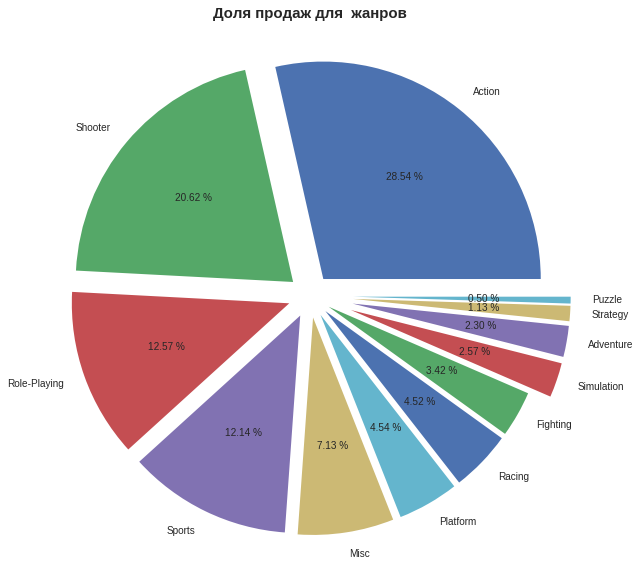

In [85]:

explode=(.1,.1,.1,.1,.1,.1,.1,.1,.2,.2,.2,.2)
plt.figure(figsize=(10,10))
plt.title('Доля продаж для  жанров', fontweight='bold' , fontsize= 15)
plt.pie(top5_genre['sales_total'] , labels=top5_genre['genre'] , autopct='%.2f %%' , explode =explode)
plt.show()

In [86]:
top5_genre.head(3)

,genre,sales_total
0,Action,557.80
1,Shooter,402.91
2,Role-Playing,245.63


Топ 3 жанры

In [87]:
top5_genre.tail(3)

,genre,sales_total
9,Adventure,45.04
10,Strategy,22.16
11,Puzzle,9.85


Думаю это связано с интересном отдельного жанра , пользователи ищут новых интересных впечатлений и хотят в игре испытывать тот опыт, которые они не могли бы  испытввать в обычной жизни . Такие игры как Action,Shooter,Role-Playing могут дать пользвоателю эти эмоции и впечатления в большей степени ,чем Adventure,Strategy,Puzzle .

<div class="alert alert-info">
<h1>Комментарий ревьюера <a class="tocSkip"></a></h1>
Как ты думаешь, с чем это связано?
</div>

Самые плохо продоваемые жанры 

<a id="4"></a> <br>
## Шаг 4. Составьте портрет пользователя каждого региона

Определите для пользователя каждого региона (NA, EU, JP):
- Самые популярные платформы (топ-5). Опишите различия в долях продаж.

In [88]:
na_data=df_5years.groupby('platform')['na_sales'].sum().sort_values(ascending=False).head().reset_index()
eu_data=df_5years.groupby('platform')['eu_sales'].sum().sort_values(ascending=False).head().reset_index()
jp_data=df_5years.groupby('platform')['jp_sales'].sum().sort_values(ascending=False).head().reset_index()

display(na_data)
display(eu_data)
display(jp_data)

,platform,na_sales
0,X360,226.80
1,PS3,168.26
2,PS4,108.74
3,XOne,93.12
4,3DS,82.65


,platform,eu_sales
0,PS3,163.10
1,PS4,141.09
2,X360,117.10
3,3DS,61.27
4,PC,56.70


,platform,jp_sales
0,3DS,100.62
1,PS3,49.39
2,PSP,24.04
3,PSV,21.84
4,PS4,15.96


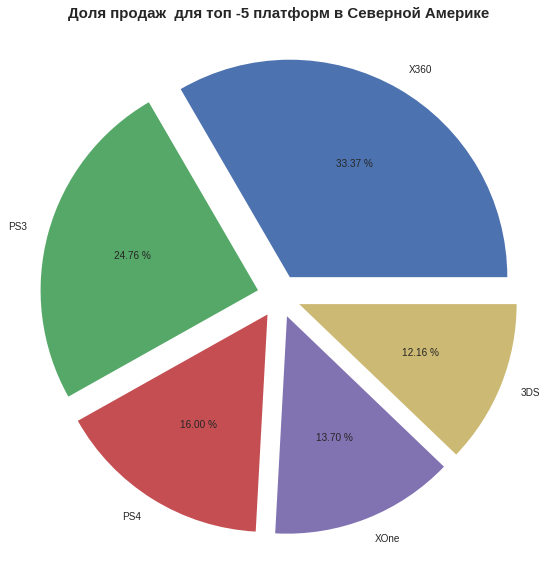

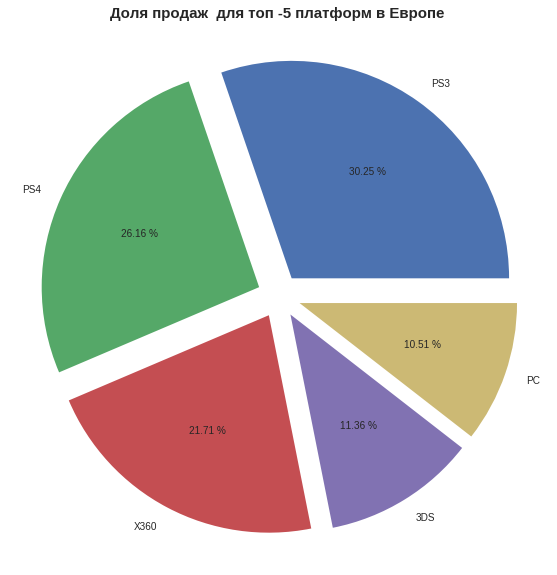

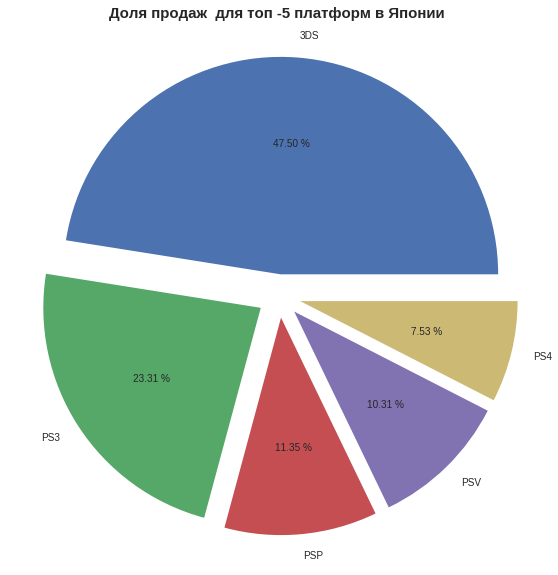

In [89]:
explode=(.1,.1,.1,.1,.1)
plt.figure(figsize=(10,10))
plt.title('Доля продаж  для топ -5 платформ в Северной Америке', fontweight='bold' , fontsize= 15)
plt.pie(na_data['na_sales'], labels=na_data['platform'] ,autopct='%.2f %%' , explode =explode)
plt.show()



explode=(.1,.1,.1,.1,.1)
plt.figure(figsize=(10,10))
plt.title('Доля продаж  для топ -5 платформ в Европе ', fontweight='bold' , fontsize= 15)
plt.pie(eu_data['eu_sales'], labels=eu_data['platform'] ,autopct='%.2f %%' , explode =explode)
plt.show()



explode=(.1,.1,.1,.1,.1)
plt.figure(figsize=(10,10))
plt.title('Доля продаж  для топ -5 платформ в Японии ', fontweight='bold' , fontsize= 15)
plt.pie(jp_data['jp_sales'], labels=jp_data['platform'] ,autopct='%.2f %%' , explode =explode)
plt.show()

#### В Северной Америке  лидирует X360 , в Европе платформы PS3 и  PS4  занимают больше половины всех  продаж из топ -5 консолей  . Интересная картина в Японии  там X360 и XOne  нет даже в топ 5 , самая большая доля  продаж среди топ -5 консолей у 3DS  47,5% 

Консоли PS3 ,PS4 ,X360 ,XOne  более весомы на глобальном рынке ,  3DS это консоль японской компании Nintendo ， вероятнее всего в силу этого  3DS на столько популярна в Японии

<div class="alert alert-success">
<h1>Комментарий ревьюера <a class="tocSkip"></a></h1>
Да, неудивительно, что есть различие
</div>

<div class="alert alert-info">
<h1>Комментарий ревьюера <a class="tocSkip"></a></h1>
Не хватает анализа полученных результатов. Почему наблюдается такой результат? Есть гипотезы?
</div>

- Самые популярные жанры (топ-5). Поясните разницу.

In [90]:
na_genre=df_5years.groupby('genre')['na_sales'].sum().sort_values(ascending=False).head().reset_index()
eu_genre=df_5years.groupby('genre')['eu_sales'].sum().sort_values(ascending=False).head().reset_index()
jp_genre=df_5years.groupby('genre')['jp_sales'].sum().sort_values(ascending=False).head().reset_index()

display(na_genre)
display(eu_genre)
display(jp_genre)

,genre,na_sales
0,Action,230.92
1,Shooter,194.43
2,Sports,108.70
3,Role-Playing,83.78
4,Misc,69.69


,genre,eu_sales
0,Action,199.12
1,Shooter,148.02
2,Sports,88.48
3,Role-Playing,62.30
4,Racing,40.58


,genre,jp_sales
0,Role-Playing,79.87
1,Action,63.62
2,Misc,17.60
3,Fighting,12.38
4,Platform,12.13


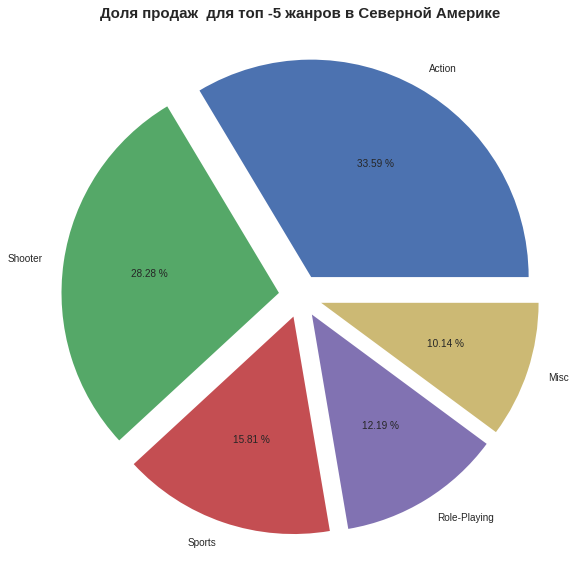

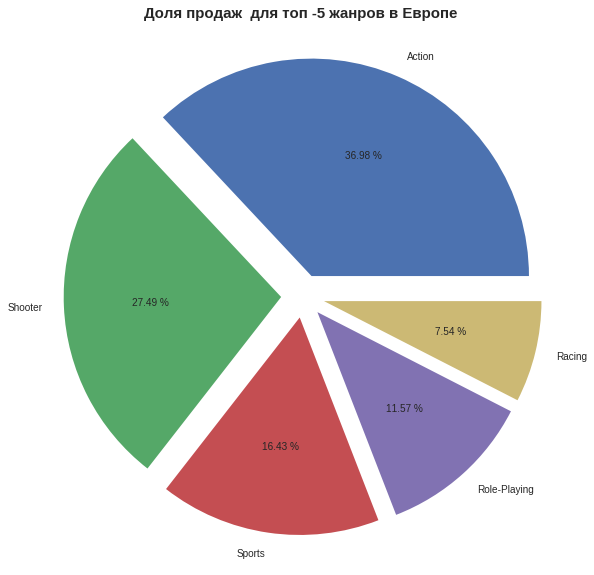

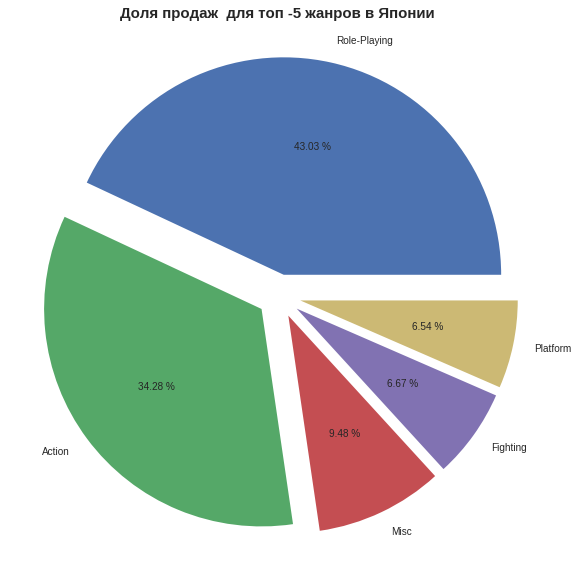

In [91]:
explode=(.1,.1,.1,.1,.1)
plt.figure(figsize=(10,10))
plt.title('Доля продаж  для топ -5 жанров в Северной Америке', fontweight='bold' , fontsize= 15)
plt.pie(na_genre['na_sales'], labels=na_genre['genre'] ,autopct='%.2f %%' , explode =explode)
plt.show()



explode=(.1,.1,.1,.1,.1)
plt.figure(figsize=(10,10))
plt.title('Доля продаж  для топ -5 жанров в Европе ', fontweight='bold' , fontsize= 15)
plt.pie(eu_genre['eu_sales'], labels=eu_genre['genre'] ,autopct='%.2f %%' , explode =explode)
plt.show()



explode=(.1,.1,.1,.1,.1)
plt.figure(figsize=(10,10))
plt.title('Доля продаж  для топ -5 жанров в Японии ', fontweight='bold' , fontsize= 15)
plt.pie(jp_genre['jp_sales'], labels=jp_genre['genre'] ,autopct='%.2f %%' , explode =explode)
plt.show()

#### В Европе и Америке первые 3 топ жанра одинаковы это Action, Shooter , Sports   . В Японии же  таких жанров в топ 5 как Shooter , Sports  вообще нет , очень большую долю занимает Role-playing

<div class="alert alert-success">
<h1>Комментарий ревьюера <a class="tocSkip"></a></h1>
Тоже интересный результат
</div>

- Влияет ли рейтинг ESRB на продажи в отдельном регионе?

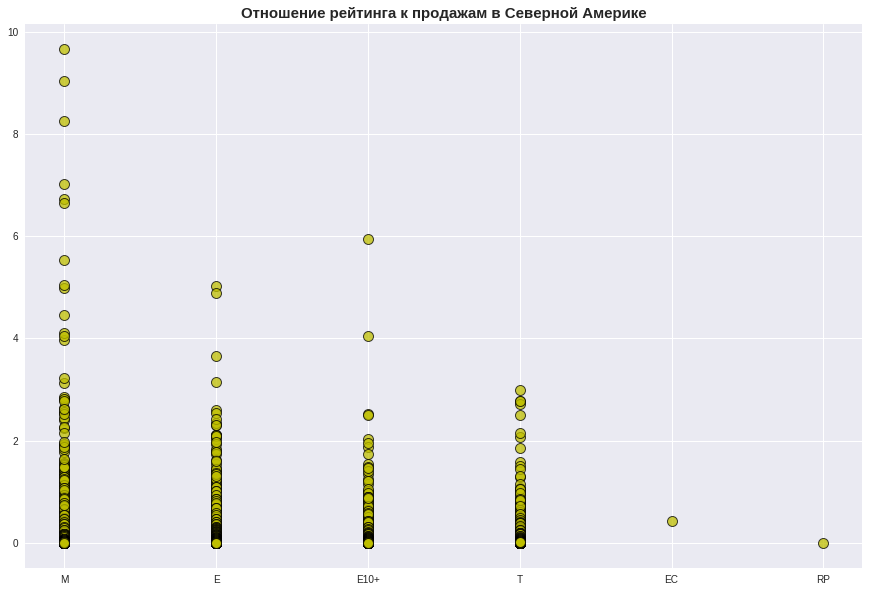

In [92]:
ratings_to_sales=df_5years[['na_sales','rating']].reset_index()
ratings_to_sales=ratings_to_sales.drop(columns=['index'])
ratings_to_sales=ratings_to_sales.dropna()

plt.figure(figsize=(15,10))
plt.title('Отношение рейтинга к продажам в Северной Америке' , fontweight='bold', fontsize=15)

plt.scatter(ratings_to_sales['rating'],ratings_to_sales['na_sales'] ,s=100 , c='y' , edgecolor='black',linewidth=1, alpha=0.75)

plt.show()


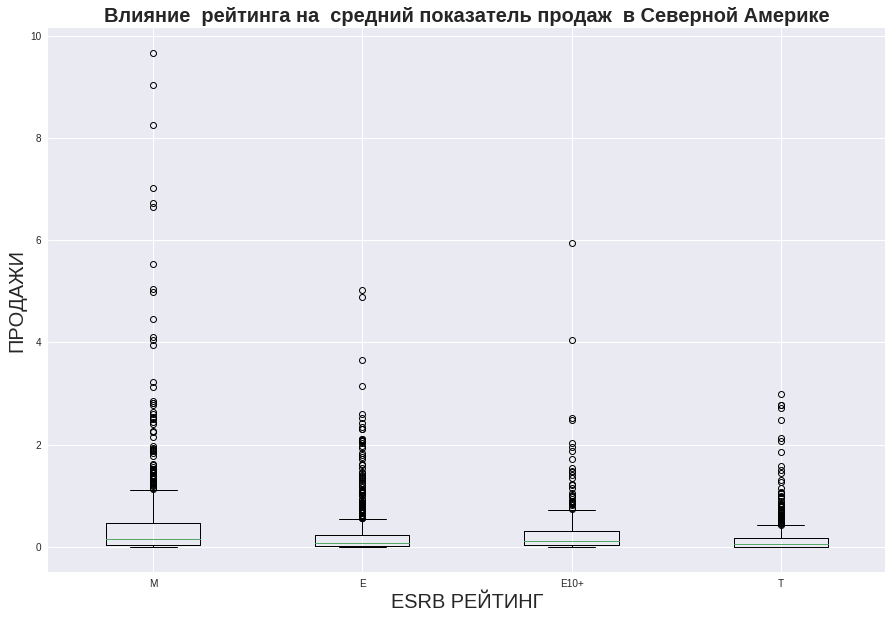

In [93]:
Mna=df_5years.loc[df_5years['rating']=="M"]['na_sales']
Ena=df_5years.loc[df_5years['rating']=="E"]['na_sales']
E10_na=df_5years.loc[df_5years['rating']=="E10+"]['na_sales']
Tna=df_5years.loc[df_5years['rating']=="T"]['na_sales']
e=df_5years.loc[df_5years['rating']=="M"]['eu_sales']
j=df_5years.loc[df_5years['rating']=="M"]['eu_sales']
labels=['M','E','E10+','T']
plt.figure(figsize=(15,10))
plt.title('Влияние  рейтинга на  средний показатель продаж  в Северной Америке' , fontweight='bold',fontsize=20)
plt.ylabel('ПРОДАЖИ',fontsize=20)
plt.xlabel('ESRB РЕЙТИНГ',fontsize=20)
plt.boxplot([Mna,Ena,E10_na,Tna],labels=labels)
plt.show()

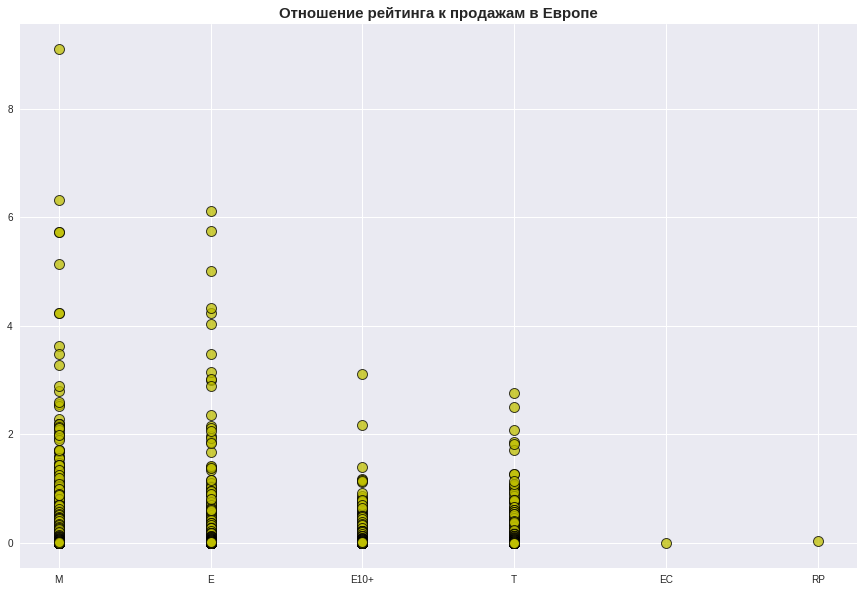

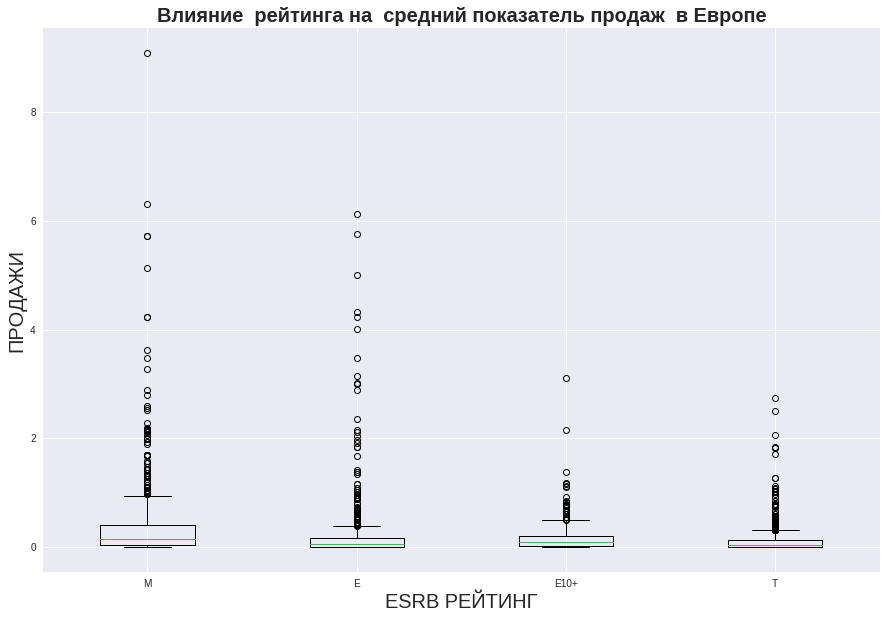

In [94]:
ratings_to_sales_eu=df_5years[['eu_sales','rating']].reset_index()
ratings_to_sales_eu=ratings_to_sales_eu.drop(columns=['index'])
ratings_to_sales_eu=ratings_to_sales_eu.dropna()

plt.figure(figsize=(15,10))
plt.title('Отношение рейтинга к продажам в Европе' , fontweight='bold', fontsize=15)

plt.scatter(ratings_to_sales_eu['rating'],ratings_to_sales_eu['eu_sales'] ,s=100 , c='y' , edgecolor='black',linewidth=1, alpha=0.75)

plt.show()

Meu=df_5years.loc[df_5years['rating']=="M"]['eu_sales']
Eeu=df_5years.loc[df_5years['rating']=="E"]['eu_sales']
E10_eu=df_5years.loc[df_5years['rating']=="E10+"]['eu_sales']
Teu=df_5years.loc[df_5years['rating']=="T"]['eu_sales']

labels=['M','E','E10+','T']
plt.figure(figsize=(15,10))
plt.title('Влияние  рейтинга на  средний показатель продаж  в Европе' , fontweight='bold',fontsize=20)
plt.ylabel('ПРОДАЖИ',fontsize=20)
plt.xlabel('ESRB РЕЙТИНГ',fontsize=20)
plt.boxplot([Meu,Eeu,E10_eu,Teu],labels=labels)
plt.show()

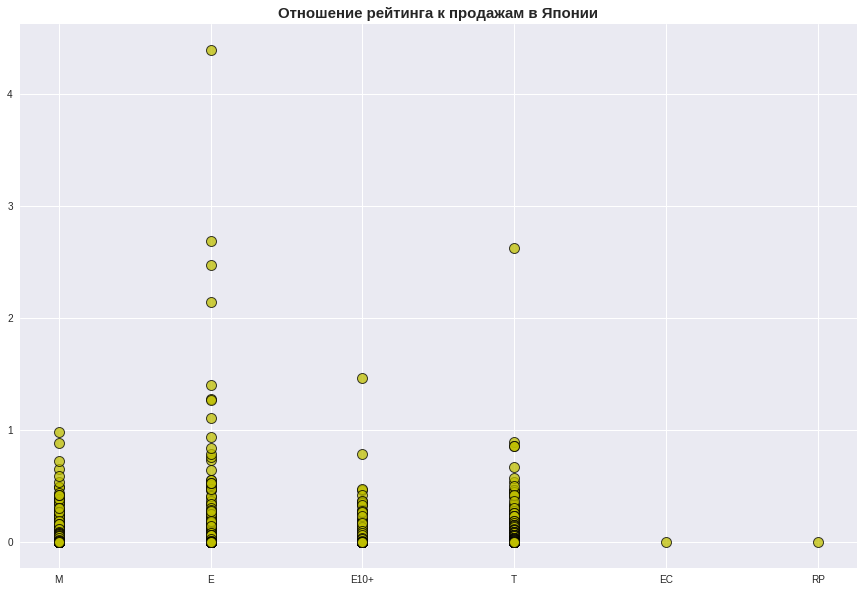

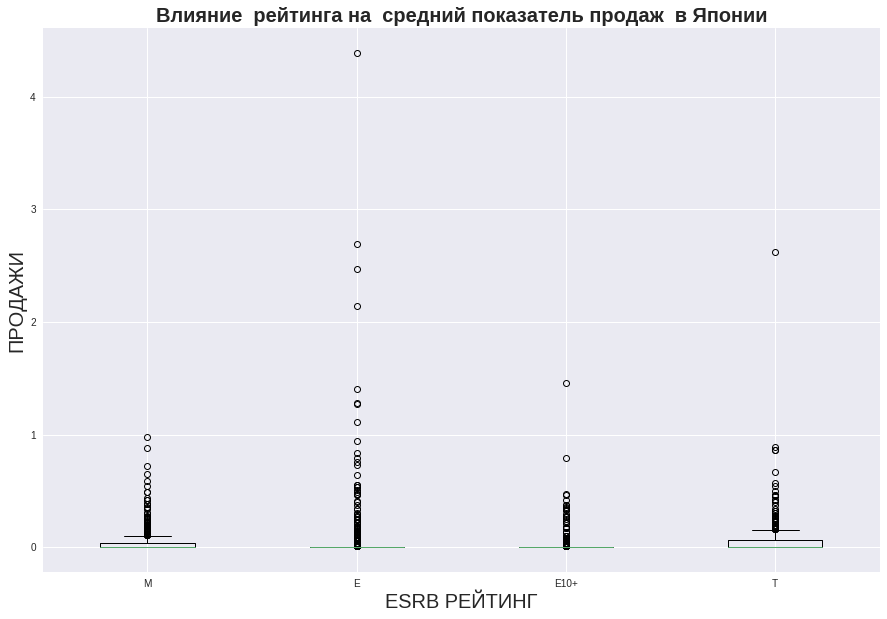

In [95]:
ratings_to_sales_jp=df_5years[['jp_sales','rating']].reset_index()
ratings_to_sales_jp=ratings_to_sales_jp.drop(columns=['index'])
ratings_to_sales_jp=ratings_to_sales_jp.dropna()

plt.figure(figsize=(15,10))
plt.title('Отношение рейтинга к продажам в Японии' , fontweight='bold', fontsize=15)

plt.scatter(ratings_to_sales_jp['rating'],ratings_to_sales_jp['jp_sales'] ,s=100 , c='y' , edgecolor='black',linewidth=1, alpha=0.75)

plt.show()

Mjp=df_5years.loc[df_5years['rating']=="M"]['jp_sales']
Ejp=df_5years.loc[df_5years['rating']=="E"]['jp_sales']
E10_jp=df_5years.loc[df_5years['rating']=="E10+"]['jp_sales']
Tjp=df_5years.loc[df_5years['rating']=="T"]['jp_sales']

labels=['M','E','E10+','T']
plt.figure(figsize=(15,10))
plt.title('Влияние  рейтинга на  средний показатель продаж  в Японии' , fontweight='bold',fontsize=20)
plt.ylabel('ПРОДАЖИ',fontsize=20)
plt.xlabel('ESRB РЕЙТИНГ',fontsize=20)
plt.boxplot([Mjp,Ejp,E10_jp,Tjp],labels=labels)
plt.show()




In [96]:
df_5years['rating'].value_counts()

M       622
E       618
T       616
E10+    456
EC        1
RP        1
Name: rating, dtype: int64

#### В Европе и Америке у игр с рейтингом  М  в среднем лучше продажи  ,чем у игр с другими рейтингами .  В Японии лучше продаются игры с Рейтингом М и Т  и совсем не влияетс

<div class="alert alert-info">
<h1>Комментарий ревьюера <a class="tocSkip"></a></h1>
Такое чувство, что EC и RP умершие жанры
</div>

<a id="5"></a> <br>

## Шаг 5. Проверьте гипотезы

- Средние пользовательские рейтинги платформ Xbox One и PC одинаковые 

Нулевая гипотеза :Средние пользовательские рейтинги платформ Xbox One и PC одинаковые

Альтернативная: Средние пользовательские рейтинги платформ Xbox One и PC разные 

<div class="alert alert-danger">
<h1>Комментарий ревьюера <a class="tocSkip"></a></h1>
Внимательно прочти теорию о том, как ставятся гипотезы

Мы предполагаем, что различия нет в нулевой гипотезе

</div>

<div class="alert alert-info">
<h1>Комментарий студента <a class="tocSkip"></a></h1>
Поправил
</div>

<div class="alert alert-danger">
<h1>Комментарий ревьюера v2 <a class="tocSkip"></a></h1>
Видимо, не сохранилось:)
    
$H_0$ две выборки имеют что-то <span> одинаковое </span>(например, средние пользовательские рейтинги).

$H_1$ ... не равны
</div>

In [97]:
display(df_5years)
df_5years['platform'].value_counts()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,sales_total
16,Grand Theft Auto V,PS3,2013,Action,7.02,9.09,0.98,3.96,97.0,8.2,M,21.05
23,Grand Theft Auto V,X360,2013,Action,9.66,5.14,0.06,1.41,97.0,8.1,M,16.27
29,Call of Duty: Modern Warfare 3,X360,2011,Shooter,9.04,4.24,0.13,1.32,88.0,3.4,M,14.73
31,Call of Duty: Black Ops 3,PS4,2015,Shooter,6.03,5.86,0.36,2.38,73.0,7.4,NaN,14.63
33,Pokemon X/Pokemon Y,3DS,2013,Role-Playing,5.28,4.19,4.35,0.78,74.0,7.8,NaN,14.60
...,...,...,...,...,...,...,...,...,...,...,...,...
16703,Strawberry Nauts,PSV,2016,Adventure,0.00,0.00,0.01,0.00,66.0,7.6,NaN,0.01
16707,Aiyoku no Eustia,PSV,2014,Misc,0.00,0.00,0.01,0.00,69.0,7.1,NaN,0.01
16710,Samurai Warriors: Sanada Maru,PS3,2016,Action,0.00,0.00,0.01,0.00,68.0,7.4,NaN,0.01
16712,Haitaka no Psychedelica,PSV,2016,Adventure,0.00,0.00,0.01,0.00,66.0,7.6,NaN,0.01


PS3     708
3DS     512
X360    498
PSV     429
PS4     392
PC      389
PSP     312
XOne    247
Wii     197
DS      184
WiiU    147
PS2       7
Name: platform, dtype: int64

In [98]:
pc=df_5years.loc[df_5years['platform']=='PC']
xone=df_5years.loc[df_5years['platform']=='XOne']

var_pc=np.var(pc['user_score'])
var_xone=np.var(xone['user_score'])
print(var_xone/var_pc)

0.702506791004333


 Дисперсии двух выборок сравниваем  отдельно, сейчас они различаются более чем на 5%, значит  считаем отличие значимым и выбираем equal_var = False

In [99]:
pc_user_score =pc['user_score'] 

xone_user_score =xone['user_score'] 

alpha = .05

results = st.ttest_ind(pc_user_score,xone_user_score,equal_var = False ) 

print('p-значение: ',results.pvalue)

if (results.pvalue < alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")
    
    

p-значение:  0.41348209080192533
Не получилось отвергнуть нулевую гипотезу


<div class="alert alert-success">
<h1>Комментарий ревьюера <a class="tocSkip"></a></h1>
Верно посчитано верно, осталось формулировки поправить и выводы соответственоо
</div>

Нельзя сказать ,что средние пользовательские рейтинги платформ Xbox One и PC НЕ одинаковые

- Средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») разные.

Нулевая гипотеза : Средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») одинаковые .

Альтернативная гипотеза : Средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») разные.

<div class="alert alert-success">
<h1>Комментарий ревьюера <a class="tocSkip"></a></h1>
Вот тут верно поставлена гипотеза нулевая и альтернативная, молодец
</div>

In [100]:
action=df_5years.loc[df_5years['genre']=='Action']
sports=df_5years.loc[df_5years['genre']=='Sports']

var_action=np.var(action['user_score'])
var_sports=np.var(sports['user_score'])
print(var_action/var_sports)

0.41309783647772397


Дисперсии двух выборок сравниваем  отдельно, сейчас они различаются более чем на 5%, значит  считаем отличие значимым и выбираем equal_var = False

In [101]:
action_user_score =action['user_score'] 

sports_user_score =sports['user_score'] 

alpha = .05

results = st.ttest_ind(action_user_score,sports_user_score,equal_var = False ) 

print('p-значение: ',results.pvalue)

if (results.pvalue < alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")
    

p-значение:  2.229657986343499e-18
Отвергаем нулевую гипотезу


Нельзя сказать ,что средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») одинаковые .

<div class="alert alert-success">
<h1>Комментарий ревьюера <a class="tocSkip"></a></h1>
тут все гут посчитано, молодец
</div>

 <a id="6"></a> <br>
 ## Шаг 6. Напишите общий вывод

1.C 1980 по 1995 игры  практически не выпускались , с 1995 года по 2009 видим постоянный рост из года в год на максимумах до  более1400 игр в год . в 2012 году резкий обвал в 2,5 раза по количеству  выпушенных игр в год . с 2012 по 2016 в среднем год выпускают по 600 игр
2. Виден общий тренд на снижение продаж для каждой платформе ,  цикл жизни платформы это резкий всплеск в течении 2-3 лет и потом постепенный спад 
3.Видим ,что платформа  3DS  по продажам обходит XOne  не за счет в среднем большых продаж на игру  ,а за счет  бОльшего количества  игр, которые  продались гораздо лучше средних значений . Средний разброс продаж на каждую игру у XOne лучше . Делаем вывод ,что  у 3DS  игры в срднем хуже продаются , но отдельные игры делают большое количество продаж . У PS3 , X360 , PS4 ,  состояние со средним значением продаж  и с количеством игр , которые перепрыгнули  3std ，примерно одинаковое . Вывел список игр , которые деелали рекордные выручки  свыше 10 миллионов
4.Слабая  либо отрицательная корреляция между  отзывами критиков и пользвователей и продажами  игр 
5.Видим ,что пользователи и критики часто ошибаются в своих оценках . Ставят высокий рейтинг играм ,которые в итоге не становятся популярными . Но критики лучше разбиратся в играх , их рейтинг хоть немного , но коррелирует с успехом в продажах
6.В Северной Америке  лидирует X360 , в Европе платформы PS3 и  PS4  занимают больше половины всех  продаж из топ -5 консолей  . Интересная картина в Японии  там X360 и XOne  нет даже в топ 5 , самая большая доля  продаж среди топ -5 консолей у 3DS  47,5% 
7.В Европе и Америке первые 3 топ жанра одинаковы это Action, Shooter , Sports   . В Японии же  таких жанров в топ 5 как Shooter , Sports  вообще нет , очень большую долю занимает Role-playing
8.В Европе и Америке у игр с рейтингом  М  в среднем лучше продажи  ,чем у игр с другими рейтингами .  В Японии лучше продаются игры с Рейтингом М и Т , но зависимость слабее чем в Европе и Америке
9. После проверки гипотез выяснилось : а)Нельзя сказать ,что средние пользовательские рейтинги платформ Xbox One и PC НЕ одинаковые , средние значения близки б)Нельзя сказать ,что средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») одинаковые  , значения различатся .

<div class="alert alert-success">
<h1>Комментарий ревьюера <a class="tocSkip"></a></h1>
Классный и детальный вывод, молодец;)
</div>

<div class="alert alert-success">
<h2> Комментарий ревьюера</h2>

-Спасибо за качественно сделанный проект, было приятно проверять. 

- Видно, что приложено много усилий

- Код написан хорошо 

- Соблюдена структура проекта 
    
- Также оставил пару замечаний и советов
    
- К сожалению есть ряд критических замечаний:
    
    - поправить формулировку гипотез при ответе на первый вопрос и соотвественно выводы

Осталось поправить совсем немного:) Жду твоих исправлений!

</div>